In [1]:
# import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import fucntions for iris recognition
from IrisLocalization import IrisLocalization
from IrisNormalization import IrisNormalization
from ImageEnhancement2 import ImageEnhancement
from FeatureExtraction import FeatureExtraction

##

import glob
import math
from scipy.spatial import distance
from sklearn import metrics

In [2]:
from IrisMatching import FeatureProcessing
from IrisMatching import reduce_dim
from IrisMatching import IrisMatching
from PerformanceEvaluation import PerformanceEvaluation
from PerformanceEvaluation import GraphPerformance

In [3]:
#%%time
#X_train, y_train, X_test, y_test = FeatureProcessing()

In [4]:
#df.shape

In [3]:
df = pd.read_csv('img_featues.csv', index_col = 'Unnamed: 0')
x_coordinate = df.values[ :, :-1]
y_coordinate =  df.values[ :, -1:]

X_test = x_coordinate[107*3:]
y_test = y_coordinate[107*3:].reshape(107*4, )

X_train = x_coordinate[:107*3]
y_train = y_coordinate[:107*3].reshape(107*3,)

In [4]:
#X_train = X_train[:, range(1, df.shape[1], 2)]
#X_test = X_test[:, range(1, df.shape[1], 2)]

In [5]:
df.shape

(749, 769)

In [6]:
X_train.shape

(321, 768)

In [10]:
correct_L1,correct_L2,correct_cosine,correct_cosine_ROC = IrisMatching(X_train, y_train, X_test, y_test, 60, 0, 'LDA')

In [9]:
#print(correct_L1,correct_L2,correct_cosine,correct_cosine_ROC)

In [10]:
#reduce_dim(X_train, y_train, X_test, y_test, 2, 'LDA')

In [11]:
PerformanceEvaluation(correct_L1,correct_L2,correct_cosine)

(70.56074766355141, 75.0, 83.64485981308411)

In [12]:
%%time
comps = [10, 40 , 60, 80, 90, 106, 'No Dimensionality Reduction']
scores_dict = dict()
for i in ['LDA', 'PCA']:
    for j in comps:
        if j == 'No Dimensionality Reduction':
            match_L1,match_L2,match_cosine,match_cosine_ROC = IrisMatching(
        X_train, y_train, X_test, y_test, 106, 1, method = i)
        else:
            match_L1,match_L2,match_cosine,match_cosine_ROC = IrisMatching(
        X_train, y_train, X_test, y_test, j, 0, method = i)
        scores_dict[(i, j)] = PerformanceEvaluation(match_L1,match_L2,match_cosine)

oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
CPU times: user 1min 48s, sys: 1.3 s, total: 1min 50s
Wall time: 1min 53s


In [13]:
cols = ["correct_recognition_rate_L1", "correct_recognition_rate_L2",
        "correct_recognition_rate_cosine"]
scores = pd.DataFrame(scores_dict).T
scores.columns = cols
scores

correct_recognition_rate_L1  \
LDA 10                                             49.299065   
    40                                             72.429907   
    60                                             71.495327   
    80                                             71.261682   
    90                                             69.158879   
    106                                            70.560748   
    No Dimensionality Reduction                    72.897196   
PCA 10                                             38.317757   
    40                                             60.981308   
    60                                             64.018692   
    80                                             66.822430   
    90                                             67.757009   
    106                                            69.392523   
    No Dimensionality Reduction                    72.897196   

                                 correct_recognition_rate_L2  \
LDA 10                                             52.803738   
    40                                             71.495327   
    60                                             75.000000   
    80                                             75.233645   
    90                                             75.233645   
    106                                            75.000000   
    No Dimensionality Reduction                    65.654206   
PCA 10                                             38.317757   
    40                                             56.308411   
    60                                             58.644860   
    80                                             60.747664   
    90                                             62.383178   
    106                                            62.616822   
    No Dimensionality Reduction                    65.654206   

                                 correct_recognition_rate_cosine  
LDA 10                                                 54.205607  
    40                                                 79.205607  
    60                                                 82.009346  
    80                                                 82.242991  
    90                                                 82.242991  
    106                                                83.644860  
    No Dimensionality Reduction                        66.121495  
PCA 10                                                 39.953271  
    40                                                 58.644860  
    60                                                 61.682243  
    80                                                 63.551402  
    90                                                 64.252336  
    106                                                64.485981  
    No Dimensionality Reduction                        66.121495

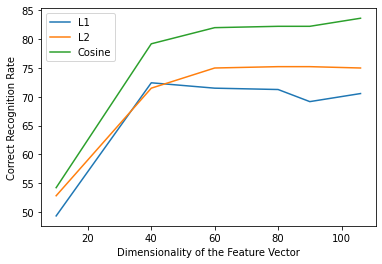

In [14]:

y = scores.values[:6]
x = np.array([10, 40 , 60, 80, 90, 106])
y1 = y[:, 0]
y2 = y[:, 1]
y3 = y[:, 2]

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'L1')
ax.plot(x, y2, label = 'L2')
ax.plot(x, y3, label = 'Cosine')
ax.legend(loc = 'upper left')
plt.xlabel("Dimensionality of the Feature Vector")
plt.ylabel("Correct Recognition Rate")
plt.show()

   Threshold       FMR      FNMR
0        0.4  0.010929  0.693878
1        0.5  0.072948  0.464646
2        0.6  0.134663  0.148148


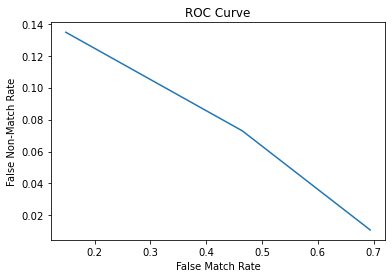

<Figure size 432x288 with 0 Axes>

In [16]:

fmr_all=[]
fnmr_all=[]

for q in range(3):
    fa=0
    fr=0
    num_1=len([i for i in correct_cosine_ROC[q] if i==1])
    num_0=len([i for i in correct_cosine_ROC[q] if i==0])

    for p in range(len(correct_cosine)):
        if correct_cosine[p]==0 and correct_cosine_ROC[q][p]==1:
            fa+=1
        if correct_cosine[p]==1 and correct_cosine_ROC[q][p]==0:
            fr+=1
    fmr=fa/num_1
    fnmr=fr/num_0
    thresh=[0.4,0.5,0.6]
    fmr_all.append(fmr)
    fnmr_all.append(fnmr)


dict1={'Threshold':thresh,'FMR':fmr_all,'FNMR':fnmr_all}
roc_table=pd.DataFrame(dict1)
print(roc_table)
roc_table.to_csv('ROC.csv')


plt.plot(fnmr_all,fmr_all)
plt.title('ROC Curve')
plt.ylabel('False Non-Match Rate')
plt.xlabel('False Match Rate')
plt.show()
plt.savefig('ROC_Curve.png')

In [18]:
correct_cosine_ROC

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,


In [12]:
roc_table

,Threshold,FMR,FNMR
0,0.4,0.010929,0.693878
1,0.5,0.072948,0.464646
2,0.6,0.134663,0.148148


In [22]:
correct_cosine

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


                                 correct_recognition_rate_L1  \
LDA 10                                             49.299065   
    40                                             72.429907   
    60                                             71.495327   
    80                                             71.261682   
    90                                             69.158879   
    106                                            70.560748   
    No Dimensionality Reduction                    72.897196   

                                 correct_recognition_rate_L2  \
LDA 10                                             52.803738   
    40                                             71.495327   
    60                                             75.000000   
    80                                             75.233645   
    90                                             75.233645   
    106                                            75.000000   
    No Dimensionality Reduction        

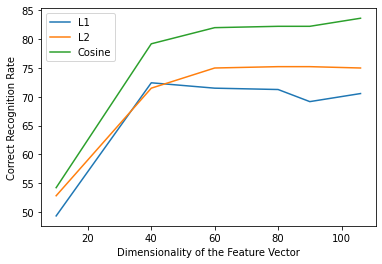

correct_recognition_rate_L1  \
LDA 10                                             49.299065   
    40                                             72.429907   
    60                                             71.495327   
    80                                             71.261682   
    90                                             69.158879   
    106                                            70.560748   
    No Dimensionality Reduction                    72.897196   

                                 correct_recognition_rate_L2  \
LDA 10                                             52.803738   
    40                                             71.495327   
    60                                             75.000000   
    80                                             75.233645   
    90                                             75.233645   
    106                                            75.000000   
    No Dimensionality Reduction                    65.654206   

                                 correct_recognition_rate_cosine  
LDA 10                                                 54.205607  
    40                                                 79.205607  
    60                                                 82.009346  
    80                                                 82.242991  
    90                                                 82.242991  
    106                                                83.644860  
    No Dimensionality Reduction                        66.121495

<Figure size 432x288 with 0 Axes>

In [7]:
GraphPerformance(X_train, y_train, X_test, y_test)